In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

#### 1. Carga y preprocesa la imagen (escala de grises y ecualización del histograma)

In [2]:
image = cv.imread('argentina-camp.jpeg')
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

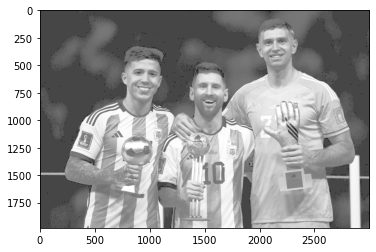

In [3]:
# ecualizacion del histograma
gray_hist = cv.equalizeHist(gray)
plt.imshow(gray_hist, cmap='gray')

#### 2. Descarga el clasificador de rostros previamente entrenado Haar Cascade de OpenCV, (haarcascade_frontalface_default.xml)

In [4]:
faceClassif = cv.CascadeClassifier('haarcascade_frontalface_default.xml')

#### 3. Identifica los rostros en la imagen, utilizando el clasificador e imprime un recuadro alrededor de cada uno.

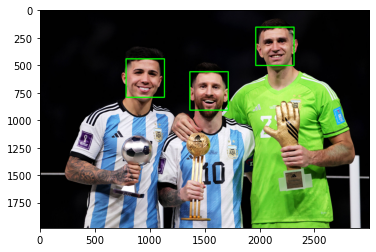

In [5]:
faces = faceClassif.detectMultiScale(gray_hist,
  scaleFactor=1.1,
  minNeighbors=5,
  minSize=(300,300),
  maxSize=(400,400))

# imprimir recuadro al rededor de cada rostro
for (x,y,w,h) in faces:
    cv.rectangle(image,(x,y),(x+w,y+h),(0,255,0),10)

img_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(img_color, cmap='gray')


#### 4. Aplica un filtro gaussiano a cada rostro identificado que permita ocultar la identidad de las personas mostradas en la imagen.

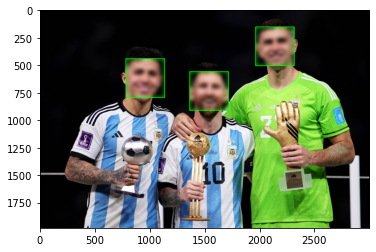

In [6]:
# aplicar filtro gaussiano a cada rostro
for (x, y, w, h) in faces:
    roi = image[y:y+h, x:x+w]
    roi = cv.GaussianBlur(roi, (95,95), 0)
    image[y:y+roi.shape[0], x:x+roi.shape[1]] = roi

img_color = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(img_color, cmap='gray')